

# Project: Investigate a Dataset - [IMDb - movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 > The internet movie database (TMDb) is a website that serve as an aonline database of world cinema.The movie data set contains 10866 movies collected from the movie database(TMDb) on Kaggle. TMDb movie data consists of metadata of movies such as imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline	,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year. Original source TMDb movie data [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). Below are question am going to analyse to find top insights and findings.



### Question(s) for Analysis
>
1. Which year has the most number of movies released.
The number of film released has increased massively. I will analyse to find out which year had the most number of movies released compared to other previous year.

 2.Which are the movies with the highest and lowest profit. Find top 20 most profitable movies
 



<a id='wrangling'></a>
## Data Wrangling
  To do my analysis with python, I used python with the following libraries Numpy, Matplotlib,Pandas and Seaborn.
  After observing dataset and question I want to analyse, I will keep only data I need. First step is to prepare my data and explore my data. With pandas library it is posssibleto read the csv file, use functions like info(), head() and describe.
      

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

tmdb_data = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
## exploring data set
tmdb_data.head()
tmdb_data.tail(5)
#  check raws and columns

tmdb_data.shape


(10866, 21)


### Data Cleaning
  > After exploring the data I explored the data i noticed there was one duplicate so I droped the duplicate row. Later I started data selection process, the columns i want to use.Here are the data I want to keep and dropped other columns which are irrelevant. Id, ,imdb_id, budget,revenue,original_title,runtime,release_date,release_date. later i found imdb_id column had 10 missing values therefore i dropped the column.Later I changed date format from string to datetime format. My dataset is now clean with 10865 entries and 9 columns.
  
 
  
  

  
  

In [7]:

## Checking Duplicates
sum(tmdb_data.duplicated())
## Dropping duplicated data
tmdb_data.drop_duplicates(inplace=True)
## Confirming if there is Duplicated data
sum(tmdb_data.duplicated())
## removing unwanted columns. let t_data represent needed dataset.

t_data=tmdb_data.drop(['popularity','cast','homepage','director','tagline','overview','genres','production_companies','vote_count','vote_average','vote_count','vote_average','keywords'],axis=1)
t_data.head()
## GETTING INFORMATION ABOUT OUR DATASET
t_data.info()
## checking missing values
t_data.isnull().sum()
  ### imdb_id has 10 missing values therefore i will drop the column 
t_data.drop(['imdb_id'],axis=1,inplace= True)
t_data.head(1)
## confirming null values
t_data.isnull().sum()
## Change date format from string to datetime format 
t_data['release_date'] = pd.to_datetime(t_data['release_date'])
  ### the dataset is clean
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
id                10865 non-null int64
imdb_id           10855 non-null object
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
release_date      10865 non-null object
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 933.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
id                10865 non-null int64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
release_date      10865 non-null datetime64[ns]
release_year      10865 non-null int64
budget_adj        10865 non-null float6

<a id='eda'></a>
## Exploratory Data Analysis
Having cleaned data, I am ready to move to explaratory analysis to analyse, visualize,compute statistics with the main objective of uncovering insights and addresssing my research question. 


### Research Question 1 (Which year has the most number of movies released!)

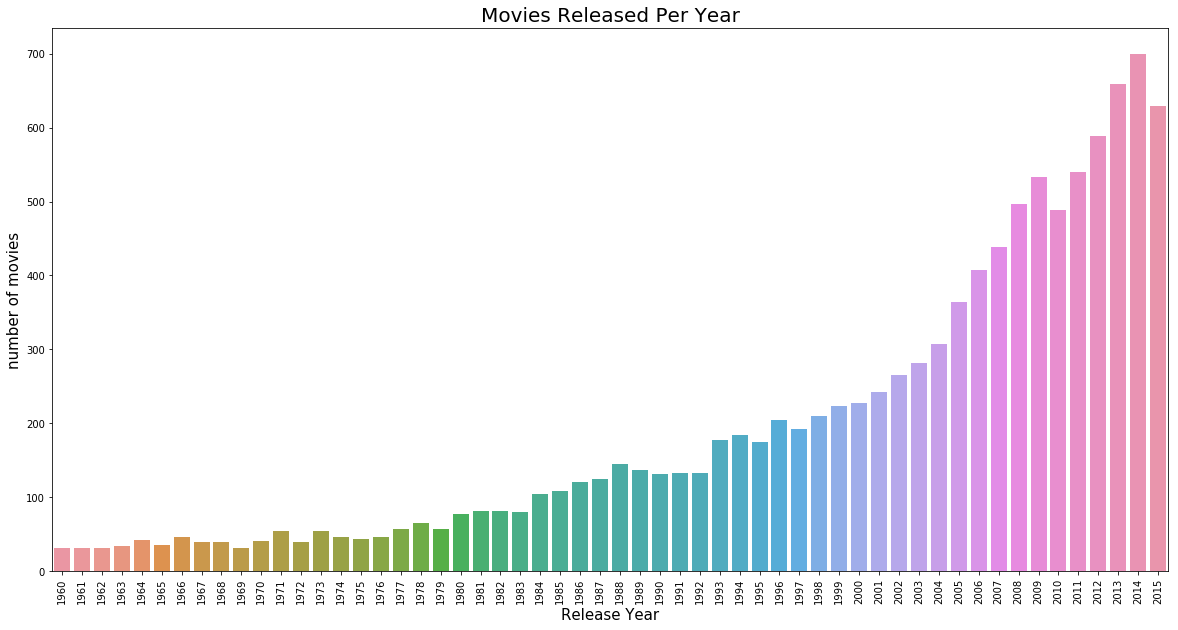

SUMMARY:From above graph we can see 2014 had the highest number of movies released with 700 movies followed by    2013 and 2015 respectively


In [8]:
## Which year had the most number of movie released
## plotting a count plot to show number of movies released
plt.figure(figsize=(20,10))
sns.countplot(t_data['release_year'])
plt.title('Movies Released Per Year', fontsize=20)
plt.xlabel('Release Year',fontsize=15)
plt.ylabel('number of movies',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## from the below graph I can conclude that 2014 has the highest number of movies released
#checking number of movies release 2014
print("SUMMARY:From above graph we can see 2014 had the highest number of movies released with {} movies followed by    2013 and 2015 respectively".format(t_data['release_year'][t_data['release_year']==2014].count()))





### Research Question 2  (Which are the movies with the highest and lowest profit. Find top 20 most profitable movies
 !)

1386    Avatar
Name: original_title, dtype: object
2244    The Warrior's Way
Name: original_title, dtype: object


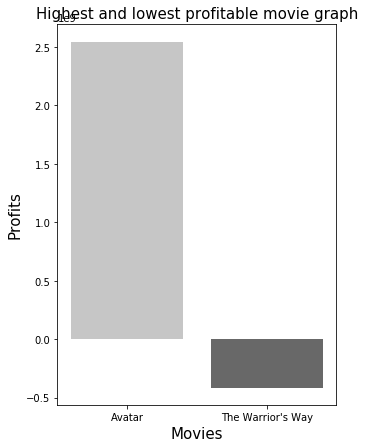

SUMMARY: From the above graph we can conclude Avatar had the highest profit generated and The Warrior's   Way had the least revenue generated 


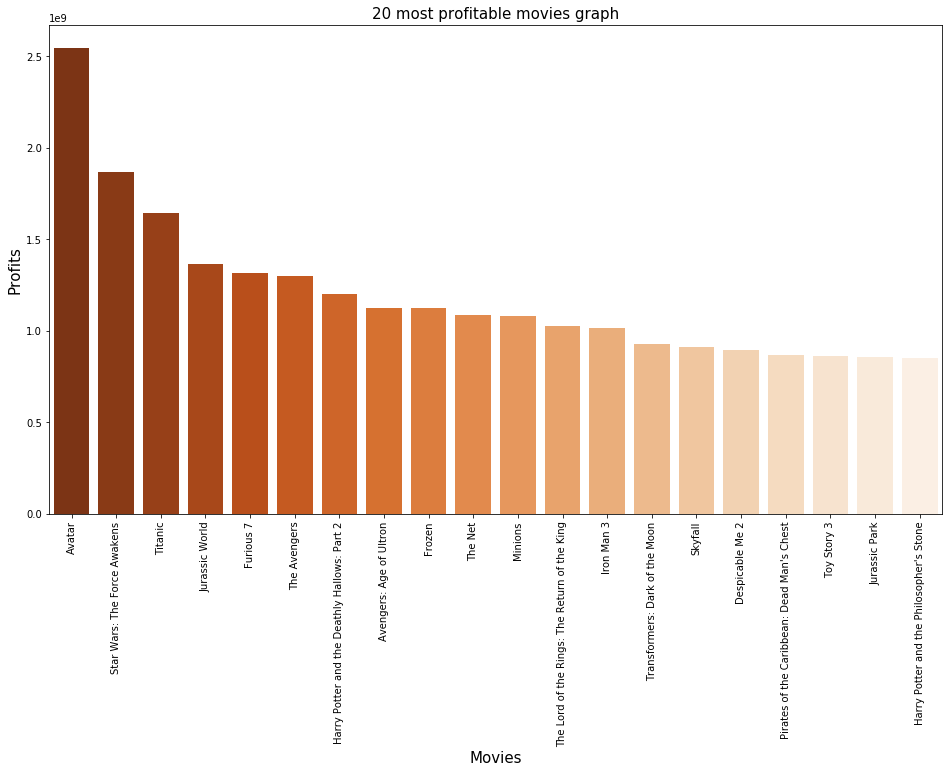

SUMMMARY:The above graph shows 20 most profitable movies in descending order


In [12]:


#   questions. Which are movies with highest and lowest profit.
#   investigate.
t_data.head(1) 
t_data['profit'] = t_data['revenue']-t_data['budget']
t_data.head()
print(t_data.original_title[t_data['profit']==t_data['profit'].max()])
print(t_data.original_title[t_data['profit']==t_data['profit'].min()])

## plotting Movie with highest and lowest profit
def sns_barplot(x):"a function that plot the barchart of the givem parameter"
plt.figure(figsize= (5,7))
def sns_barplot(x):"a function"
profit_data= t_data[(t_data.profit==t_data['profit'].max())|(t_data.profit==t_data['profit'].min())]
sns.barplot(profit_data ['original_title'],profit_data['profit'],palette= 'Greys')
plt.title('Highest and lowest profitable movie graph',fontsize= 15 )    
plt.xlabel('Movies',fontsize=15)   
plt.ylabel('Profits',fontsize=15)
plt.show()
print("SUMMARY: From the above graph we can conclude Avatar had the highest profit generated and The Warrior's   Way had the least revenue generated ")

## plotting  20 most profitable movies
plt.figure(figsize=(16,9))
p_data =t_data[['original_title','profit']].sort_values('profit',ascending= False).head(20)
sns.barplot(x='original_title',y='profit',data=p_data,palette= 'Oranges_r')
plt.title('20 most profitable movies graph',fontsize= 15 )    
plt.xlabel('Movies',fontsize=15)   
plt.ylabel('Profits',fontsize=15)
plt.xticks(rotation= 90)
plt.show()
t_data[t_data['original_title']=='Avatar']
print("SUMMMARY:The above graph shows 20 most profitable movies in descending order")

<a id='conclusions'></a>
## Conclusions

>1. From our graph above 'Movies Released Per Year' I can conclude that 2014 had the highest number of movies released followed by 2013 and 2015 respectively. 2014 had the highest number of movies released with 700 movies


> 2.From Highest and lowest profitable movie graph we can see  Avator had the highest profit generated with  2544505847 income generated. Also from 20 most profitable movies graph we can see top 20 profitable movies.
## Limitations

1.The currency of revenue and budget was not given but i wil assume it is in US DOLLAR(usd)

2.The dataset contain lots of zero budget and revenue. Example are last 10 data.


In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0